In [52]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [53]:
df_ret=pd.read_excel('Cohort_testing.xlsx')

In [54]:
df_ret

,Inv_Date,Customer_ID,total_order
0,2020-01-01 08:26:00,U001,10
1,2020-02-01 08:26:00,U001,10
2,2020-03-01 08:26:00,U001,10
3,2020-04-01 08:26:00,U001,10
4,2020-05-01 08:26:00,U001,10
5,2020-02-01 08:26:00,U002,20
6,2020-03-01 08:26:00,U002,20
7,2020-01-01 08:26:00,U002,20
8,2020-01-01 08:26:00,U003,30
9,2020-02-01 08:26:00,U003,30


In [55]:
df_ret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
Inv_Date       13 non-null datetime64[ns]
Customer_ID    13 non-null object
total_order    13 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 440.0+ bytes


In [56]:
df_ret['OrderPeriod'] = df_ret.Inv_Date.apply(lambda x: x.strftime('%Y-%m'))
df_ret.set_index('Customer_ID', inplace=True)
df_ret['CohortGroup'] = df_ret.groupby(level=0)['Inv_Date'].min().apply(lambda x: x.strftime('%Y-%m'))
df_ret.reset_index(inplace=True)
df_ret.tail(20)

,Customer_ID,Inv_Date,total_order,OrderPeriod,CohortGroup
0,U001,2020-01-01 08:26:00,10,2020-01,2020-01
1,U001,2020-02-01 08:26:00,10,2020-02,2020-01
2,U001,2020-03-01 08:26:00,10,2020-03,2020-01
3,U001,2020-04-01 08:26:00,10,2020-04,2020-01
4,U001,2020-05-01 08:26:00,10,2020-05,2020-01
5,U002,2020-02-01 08:26:00,20,2020-02,2020-01
6,U002,2020-03-01 08:26:00,20,2020-03,2020-01
7,U002,2020-01-01 08:26:00,20,2020-01,2020-01
8,U003,2020-01-01 08:26:00,30,2020-01,2020-01
9,U003,2020-02-01 08:26:00,30,2020-02,2020-01


In [57]:
grouped = df_ret.groupby(['CohortGroup', 'OrderPeriod'])

In [58]:
cohorts = grouped.agg({'Customer_ID': pd.Series.nunique,
                       'total_order': np.sum})

In [59]:
cohorts.rename(columns={'Customer_ID': 'TotalCustomerCount',
                        'total_order': 'TotalOrderSum'}, inplace=True)
cohorts.head(100)

TotalCustomerCount  TotalOrderSum
CohortGroup OrderPeriod                                   
2020-01     2020-01                       3             60
            2020-02                       3             60
            2020-03                       3             60
            2020-04                       2             40
            2020-05                       1             10
2020-04     2020-04                       1            100

In [60]:
cohorts

TotalCustomerCount  TotalOrderSum
CohortGroup OrderPeriod                                   
2020-01     2020-01                       3             60
            2020-02                       3             60
            2020-03                       3             60
            2020-04                       2             40
            2020-05                       1             10
2020-04     2020-04                       1            100

In [61]:
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head(20)

TotalCustomerCount  TotalOrderSum  CohortPeriod
CohortGroup OrderPeriod                                                 
2020-01     2020-01                       3             60             1
            2020-02                       3             60             2
            2020-03                       3             60             3
            2020-04                       2             40             4
            2020-05                       1             10             5
2020-04     2020-04                       1            100             1

In [62]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)
cohorts

OrderPeriod  TotalCustomerCount  TotalOrderSum
CohortGroup CohortPeriod                                               
2020-01     1                2020-01                   3             60
            2                2020-02                   3             60
            3                2020-03                   3             60
            4                2020-04                   2             40
            5                2020-05                   1             10
2020-04     1                2020-04                   1            100

In [69]:
cohort_group_size = cohorts['TotalCustomerCount'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2020-01    3
2020-04    1
Name: TotalCustomerCount, dtype: int64

In [71]:
cohorts['TotalCustomerCount'].head(6)

CohortGroup  CohortPeriod
2020-01      1               3
             2               3
             3               3
             4               2
             5               1
2020-04      1               1
Name: TotalCustomerCount, dtype: int64

In [75]:
cohorts['TotalCustomerCount'].unstack(0).head()

CohortGroup,2020-01,2020-04
CohortPeriod,,
1,3.0,1.0
2,3.0,NaN
3,3.0,NaN
4,2.0,NaN
5,1.0,NaN


In [74]:
user_retention = cohorts['TotalCustomerCount'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2020-01,2020-04
CohortPeriod,,
1,1.000000,1.0
2,1.000000,NaN
3,1.000000,NaN
4,0.666667,NaN
5,0.333333,NaN


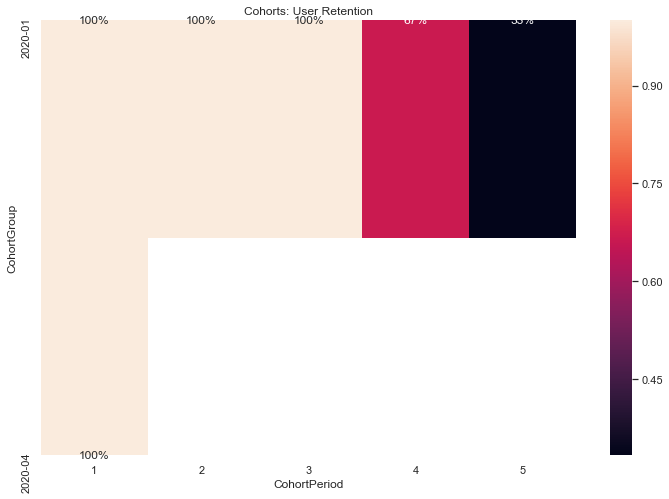

In [76]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');